## **How are in-demand skills trending for Data Analysts?**

### Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

#### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sejal\anaconda3\envs\Python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Group the Skills by Month

In [4]:
df_DA_US=df[(df['job_title']=='Data Analyst') & (df['job_country']=='United States')].copy()
#skill count per month
df_DA_US['job_posted_month']=df_DA_US['job_posted_date'].dt.month

#Explode job_skills column
df_DA_US_explode=df_DA_US.explode('job_skills')
df_DA_US_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,python,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,unix,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,excel,"{'analyst_tools': ['excel'], 'async': ['jira']...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,databricks,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,tableau,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,excel,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7


#### Pivot in preparation for Plotting

In [6]:
df_DA_US_pivot=df_DA_US_explode.pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


#### Sort Columns by Counts

In [15]:
df_DA_US_pivot.loc['Total']=df_DA_US_pivot.sum()
df_DA_US_pivot=df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot=df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,colocation,yarn,hugging face,nuix,apl,nltk,mariadb,graphql,mxnet,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,1,0,0,0,0,1,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,1,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,1,0,0,0,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,1,1,0,0,0,0,0


#### Plot the Monthly Skill Counts

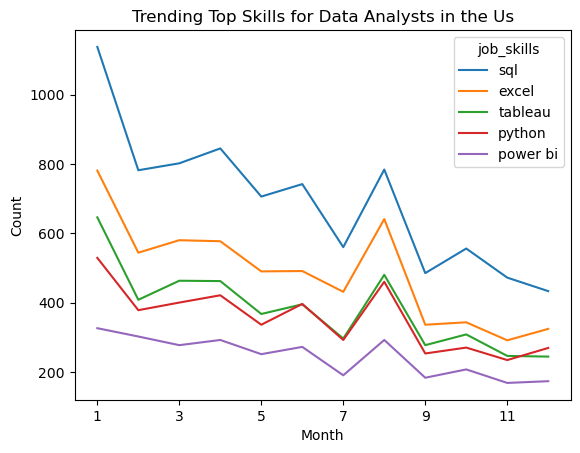

In [17]:
df_DA_US_pivot.iloc[:,:5].plot(kind='line')
plt.title('Trending Top Skills for Data Analysts in the Us')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

#### Calculate Percentage of Total Jobs

In [19]:
#Get monthly totals
df_DA_totals=df_DA_US.groupby('job_posted_month').size()
df_DA_totals

job_posted_month
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [30]:
#calculating percentage by dividing first 12 rows of df_DA_pivot by df_DA_totals
df_DA_US_percent=round(df_DA_US_pivot.iloc[:12].div(df_DA_totals/100,axis=0))

#changing month number to month name
df_DA_US_percent=df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month_name']=df_DA_US_percent['job_posted_month'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_US_percent=df_DA_US_percent.set_index('job_posted_month_name')
df_DA_US_percent=df_DA_US_percent.drop(columns='job_posted_month')

df_DA_US_percent


job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,colocation,yarn,hugging face,nuix,apl,nltk,mariadb,graphql,mxnet,next.js
job_posted_month_name,,,,,,,,,,,,,,,,,,,,,
Jan,63.0,43.0,36.0,29.0,18.0,22.0,19.0,9.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feb,61.0,42.0,32.0,29.0,24.0,21.0,18.0,10.0,10.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,59.0,43.0,34.0,29.0,20.0,22.0,18.0,10.0,9.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apr,62.0,42.0,34.0,31.0,21.0,19.0,17.0,10.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,61.0,42.0,32.0,29.0,22.0,18.0,19.0,8.0,10.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jun,61.0,41.0,33.0,33.0,23.0,17.0,21.0,10.0,10.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jul,59.0,45.0,31.0,31.0,20.0,19.0,20.0,11.0,11.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug,55.0,45.0,34.0,33.0,21.0,19.0,23.0,8.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sep,57.0,39.0,32.0,30.0,21.0,18.0,18.0,8.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Plot Monthly Skill Demand

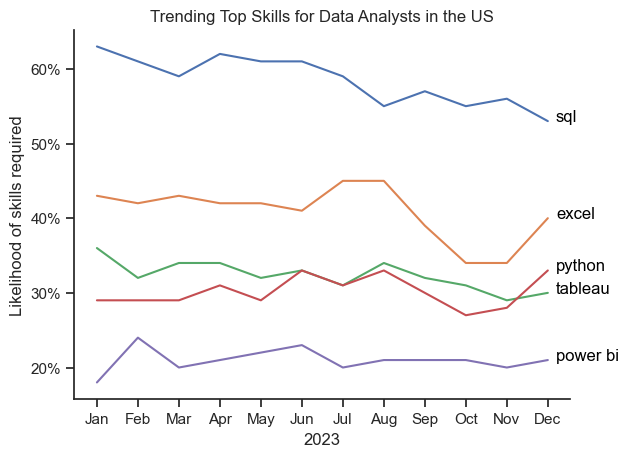

In [70]:
from matplotlib.ticker import PercentFormatter
df_plot=df_DA_US_percent.iloc[:,:5]
sns.lineplot(data=df_plot,dashes=False,legend=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood of skills required')
plt.xlabel('2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

#annonate the plot with skills name
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i], color='black')